In [1]:
cd ../utils


/home/thom/Documents/research/RandomBridge/utils


In [2]:
import collections
import datetime
import importlib
from pdb import pm
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

import CardUtils as cu
import pbn_parse
import PyRandomUtils as pru
import RandomTests
from sobol_seq import SobolGen

In [44]:
importlib.reload(cu)

<module 'CardUtils' from '/home/thom/Documents/research/RandomBridge/utils/CardUtils.py'>

In [3]:
#bad prng
bad = pru.LCG(mod=2**16, a=5, c=0, seed=1)

#deterministic gen
sobol  = SobolGen(1)

#good prng
good = pru.PyRandGen(1)

In [19]:
def make_ts(gen, batches=700, batch_size=32, rel=True):
    ts = [sum((cu.get_features(pru.deck(gen)) for i in range(batch_size))) / batch_size
           for j in range(batches)]
    if not rel:
        return np.array(ts).T
    else:
        return (np.array(ts)-cu.theoretical_probabilities).T


def make_bits(arr):
    return (np.sign(arr)+1) //2

def make_graphs(ts):
    dim = ts.shape[0]
    fig, ax = plt.subplots(dim,1, figsize = (15, 100))

    for i in range(dim):
        plt.subplot(dim,1,i+1)
        plt.title(cu.feature_string[i],fontsize=16)
        plt.plot(ts[i] - cu.theoretical_probabilities[i])

def print_means(ts):
    means = np.apply_along_axis(np.mean, 1, ts)
    tp = cu.theoretical_probabilities
    print("{:22}{:^22}{:^22}{:^22}".format("Feature", "p", "p_hat", "p-p_hat"))
    for i in range(len(cu.feature_string)):
        print("{:20} {: 20.18f} {: 20.18f} {: 20.18f}".format(cu.feature_string[i], 
                                           cu.theoretical_probabilities[i], 
                                           means[i], 
                                           cu.theoretical_probabilities[i]-means[i]))

In [59]:
badts = make_ts(bad)

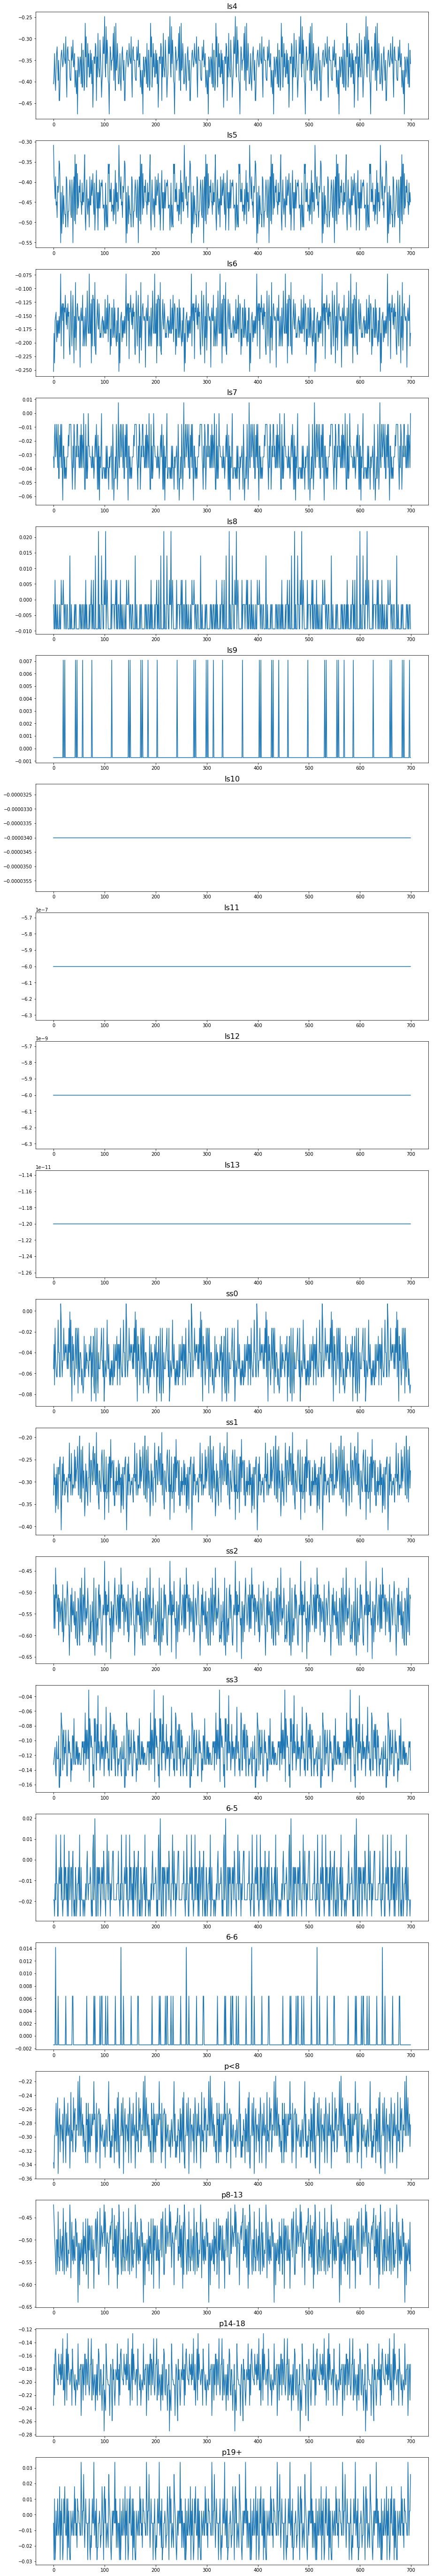

In [61]:
make_graphs(badts)

In [60]:
badbits = make_bits(badts)

In [45]:
cu.print_features()

  0: ls4     |0.3508000000000
  1: ls5     |0.4434000000000
  2: ls6     |0.1655000000000
  3: ls7     |0.0353000000000
  4: ls8     |0.0047000000000
  5: ls9     |0.0003700000000
  6: ls10    |0.0000170000000
  7: ls11    |0.0000003000000
  8: ls12    |0.0000000030000
  9: ls13    |0.0000000000060
 10: ss0     |0.0512000000000
 11: ss1     |0.3055000000000
 12: ss2     |0.5380000000000
 13: ss3     |0.1054000000000
 14: 6-5     |0.0135600000000
 15: 6-6     |0.0007200000000
 16: p<8     |0.2858460000000
 17: p8-13   |0.5153980000000
 18: p14-18  |0.1843050000000
 19: p19+    |0.0144510000000


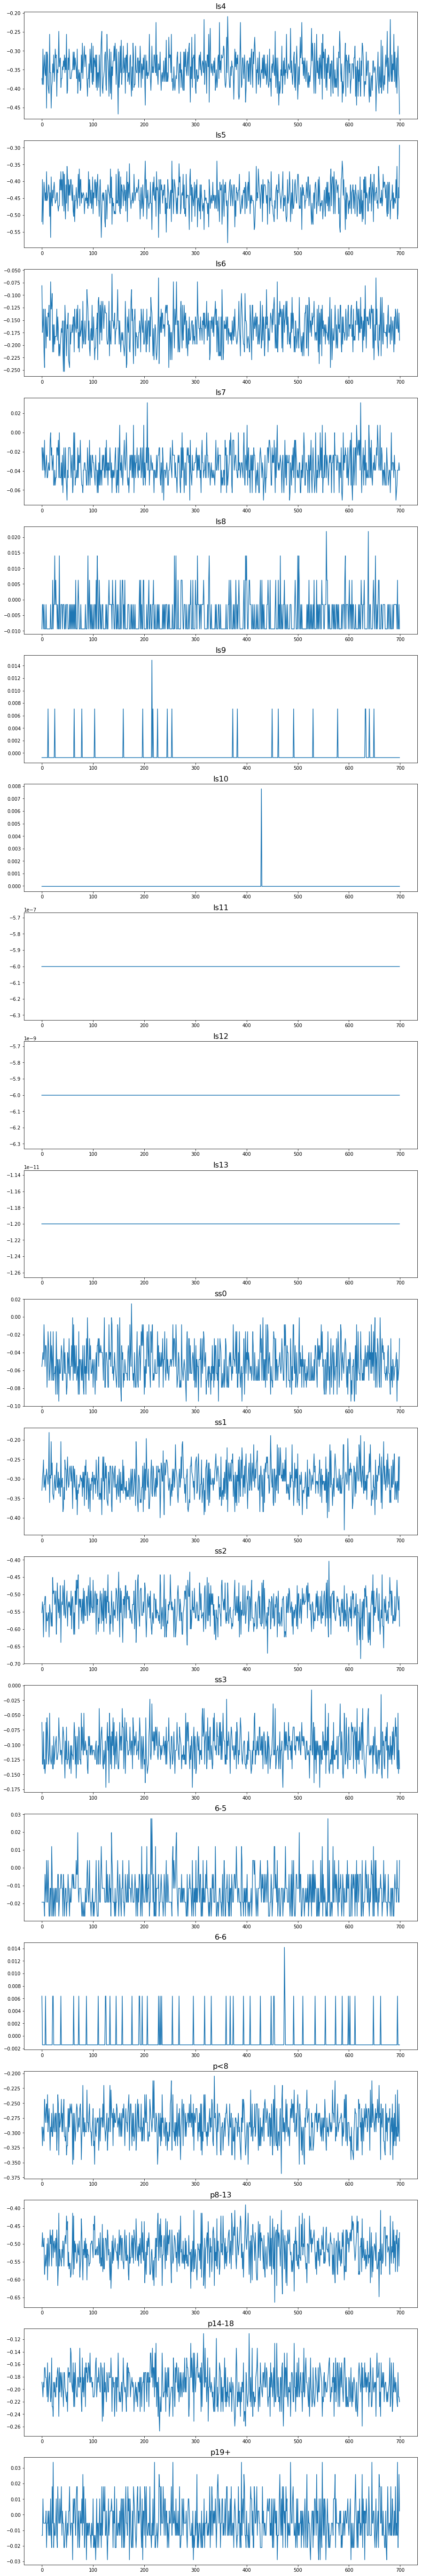

In [58]:
make_graphs(badts)

In [70]:
sum(badbits.T)/len(badbits.T)

array([0.46714286, 0.50285714, 0.53857143, 0.57      , 0.44285714,
       0.05714286, 0.        , 0.        , 0.        , 0.        ,
       0.55857143, 0.57142857, 0.44      , 0.33142857, 0.54142857,
       0.10714286, 0.43857143, 0.57428571, 0.39285714, 0.77571429])

In [64]:
RandomTests.word_test(badbits[15],word_len = 8, verbose=True, alpha=0.05)

Tuple     |Observed  |Expected  |Diff      
--------------------------------------------------
(0,)      |624       |350.0     |    +274.0|0.5662889930|False
(1,)      |75        |350.0     |    -275.0|0.5679651080|False
--------------------------------------------------
(0, 0)    |279       |87.5      |    +191.5|0.7936164202|False
(0, 1)    |37        |87.5      |     -50.5|0.2610269350|False
(1, 0)    |28        |87.5      |     -59.5|0.3053837183|False
(1, 1)    |5         |87.5      |     -82.5|0.4138054259|False
--------------------------------------------------
(0, 0, 0) |168       |29.125    |  +138.875|0.9284900576|False
(0, 0, 1) |17        |29.125    |   -12.125|0.1250309964|False
(0, 1, 0) |18        |29.125    |   -11.125|0.1147938234|False
(0, 1, 1) |4         |29.125    |   -25.125|0.2556174002|False
(1, 0, 0) |20        |29.125    |    -9.125|0.0942635784|False
(1, 0, 1) |2         |29.125    |   -27.125|0.2751691104|False
(1, 1, 0) |4         |29.125    |   -25.125|0.2

{(0,): 624,
 (1,): 75,
 (0, 0): 279,
 (0, 1): 37,
 (1, 0): 28,
 (1, 1): 5,
 (0, 0, 0): 168,
 (0, 0, 1): 17,
 (0, 1, 0): 18,
 (0, 1, 1): 4,
 (1, 0, 0): 20,
 (1, 0, 1): 2,
 (1, 1, 0): 4,
 (1, 1, 1): 0,
 (0, 0, 0, 0): 110,
 (0, 0, 0, 1): 10,
 (0, 0, 1, 0): 10,
 (0, 0, 1, 1): 5,
 (0, 1, 0, 0): 21,
 (0, 1, 0, 1): 0,
 (0, 1, 1, 0): 6,
 (0, 1, 1, 1): 0,
 (1, 0, 0, 0): 12,
 (1, 0, 0, 1): 0,
 (1, 0, 1, 0): 0,
 (1, 0, 1, 1): 0,
 (1, 1, 0, 0): 0,
 (1, 1, 0, 1): 0,
 (1, 1, 1, 0): 0,
 (1, 1, 1, 1): 0,
 (0, 0, 0, 0, 0): 79,
 (0, 0, 0, 0, 1): 12,
 (0, 0, 0, 1, 0): 9,
 (0, 0, 0, 1, 1): 1,
 (0, 0, 1, 0, 0): 8,
 (0, 0, 1, 0, 1): 1,
 (0, 0, 1, 1, 0): 3,
 (0, 0, 1, 1, 1): 0,
 (0, 1, 0, 0, 0): 8,
 (0, 1, 0, 0, 1): 1,
 (0, 1, 0, 1, 0): 1,
 (0, 1, 0, 1, 1): 0,
 (0, 1, 1, 0, 0): 2,
 (0, 1, 1, 0, 1): 0,
 (0, 1, 1, 1, 0): 0,
 (0, 1, 1, 1, 1): 0,
 (1, 0, 0, 0, 0): 9,
 (1, 0, 0, 0, 1): 1,
 (1, 0, 0, 1, 0): 0,
 (1, 0, 0, 1, 1): 1,
 (1, 0, 1, 0, 0): 1,
 (1, 0, 1, 0, 1): 0,
 (1, 0, 1, 1, 0): 0,
 (1, 0, 1, 1, 1): 0,
